# Diffusivity Loader

In [17]:
import scipy.io
import h5py
import h5py
import xarray as xr

In [9]:
with h5py.File('/swot/SUM05/amf2288/global_kappa_epsilon.mat', 'r') as f:
    # Print the keys to understand the structure
    print(list(f.keys()))

['#refs#', 'A4']


In [13]:
# Load the .mat file using h5py
with h5py.File('/swot/SUM05/amf2288/global_kappa_epsilon.mat', 'r') as f:
    # Print the keys to understand the structure
    print(list(f.keys()))

    # Access and print the shape and data type of each variable or group
    for key in f.keys():
        item = f[key]
        if isinstance(item, h5py.Group):
            print(f"Group '{key}': contains {list(item.keys())}")
        elif isinstance(item, h5py.Dataset):
            print(f"Dataset '{key}': shape={item.shape}, dtype={item.dtype}")
        else:
            print(f"Unknown type for '{key}'")


['#refs#', 'A4']
Group '#refs#': contains ['a', 'b']
Group 'A4': contains ['K', 'e', 'info', 'lat', 'lon', 'z']


In [22]:
# Load the .mat file using h5py
with h5py.File('/swot/SUM05/amf2288/global_kappa_epsilon.mat', 'r') as f:
    # Access datasets
    K = f['A4']['K'][:]
    e = f['A4']['e'][:]
    lat = f['A4']['lat'][:].reshape(-1)  # Reshape to 1D
    lon = f['A4']['lon'][:].reshape(-1)  # Reshape to 1D
    z = f['A4']['z'][:].reshape(-1)      # Reshape to 1D

    # Print the shape and type of the data to understand its structure
    print(f"K: shape={K.shape}, dtype={K.dtype}")
    print(f"e: shape={e.shape}, dtype={e.dtype}")
    print(f"lat: shape={lat.shape}, dtype={lat.dtype}")
    print(f"lon: shape={lon.shape}, dtype={lon.dtype}")
    print(f"z: shape={z.shape}, dtype={z.dtype}")

    # Create an xarray.Dataset
    ds = xr.Dataset(
        {
            'K': (('z', 'lon', 'lat'), K),
            'e': (('z', 'lon', 'lat'), e)
        },
        coords={
            'lat': lat,
            'lon': lon,
            'z': z
        }
    )

K: shape=(7, 120, 45), dtype=float64
e: shape=(7, 120, 45), dtype=float64
lat: shape=(45,), dtype=float64
lon: shape=(120,), dtype=float64
z: shape=(7,), dtype=float64


In [23]:
ds.to_netcdf('/swot/SUM05/amf2288/global_kappa_epsilon.nc')

In [24]:
ds = xr.open_dataset('/swot/SUM05/amf2288/global_kappa_epsilon.nc')

In [25]:
ds

<xarray.Dataset> Size: 606kB
Dimensions:  (z: 7, lon: 120, lat: 45)
Coordinates:
  * lat      (lat) float64 360B 66.0 63.0 60.0 57.0 ... -57.0 -60.0 -63.0 -66.0
  * lon      (lon) float64 960B 1.5 4.5 7.5 10.5 ... 349.5 352.5 355.5 358.5
  * z        (z) float64 56B 375.0 625.0 875.0 ... 1.375e+03 1.625e+03 1.875e+03
Data variables:
    K        (z, lon, lat) float64 302kB ...
    e        (z, lon, lat) float64 302kB ...

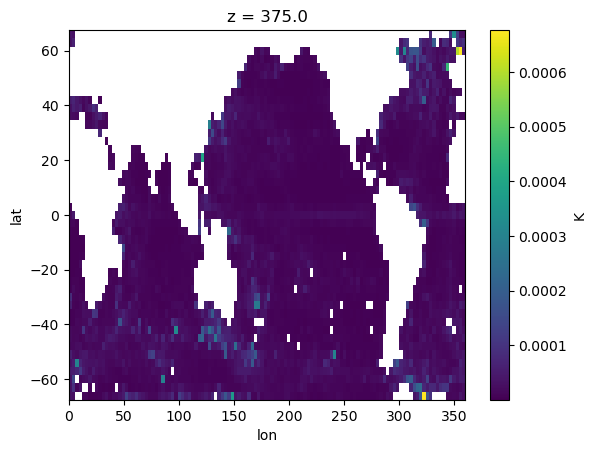

In [28]:
ds.isel(z=0).K.plot(x='lon', y='lat')